In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Let us rename the columns for better understanding.**

In [4]:
data.columns = ['Gender', 'Race', 'Parent Degree', 'Lunch', 'Course', 'Math Score', 'Reading Score', 'Writing Score'] 

In [5]:
data.head()

,Gender,Race,Parent Degree,Lunch,Course,Math Score,Reading Score,Writing Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
data.isnull().sum()

Gender           0
Race             0
Parent Degree    0
Lunch            0
Course           0
Math Score       0
Reading Score    0
Writing Score    0
dtype: int64

**Let's create a new column named average score to calculate percentages.**

In [7]:
data['Total Score']=(data['Math Score'] + data['Reading Score'] + data['Writing Score'])/3

In [8]:
data.head()

,Gender,Race,Parent Degree,Lunch,Course,Math Score,Reading Score,Writing Score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [9]:
data.groupby(['Gender']).mean()

,Math Score,Reading Score,Writing Score,Total Score
Gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


**We can see that the female candidates scored higher than the male candidates.**

**But the male candidates scored better for maths compared to female.**

Text(0.5, 1.0, 'GENDER VS TOTAL SCORE')

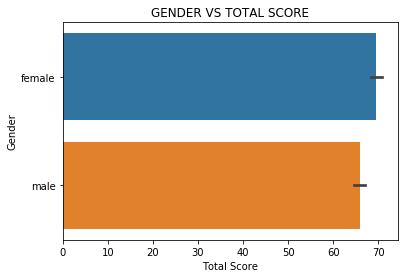

In [10]:
sns.barplot(x='Total Score',y='Gender',data=data).set_title('GENDER VS TOTAL SCORE')

Text(0.5, 1.0, 'GENDER VS MATH SCORE')

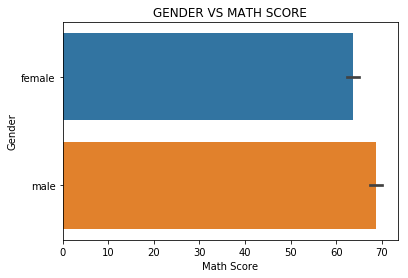

In [11]:
sns.barplot(x='Math Score',y='Gender',data=data).set_title('GENDER VS MATH SCORE')

In [12]:
data['Math Score'].mode()

0    65
dtype: int64

In [13]:
data['Math Score'].mean()

66.089

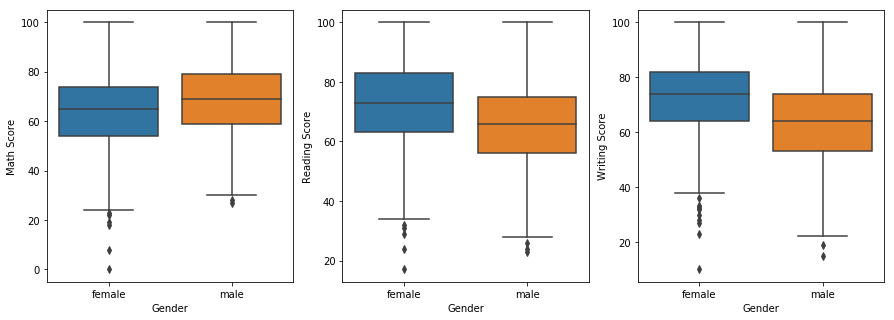

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'Gender', y = 'Math Score', data = data)

plt.subplot(1,3,2)
sns.boxplot(x = 'Gender', y = 'Reading Score', data = data)

plt.subplot(1,3,3)
sns.boxplot(x = 'Gender', y = 'Writing Score', data = data)

**This boxplot clearly shows about the marks scored by male and female in each section.**

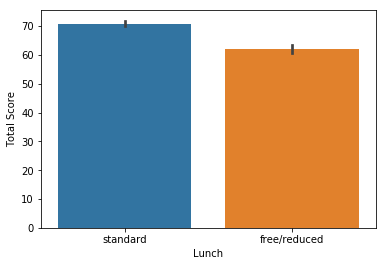

In [15]:
sns.barplot(x='Lunch',y='Total Score',data=data)

**So this clearly shows that the total score was increased when the student had a standard lunch compared to a 
reduced lunch.**

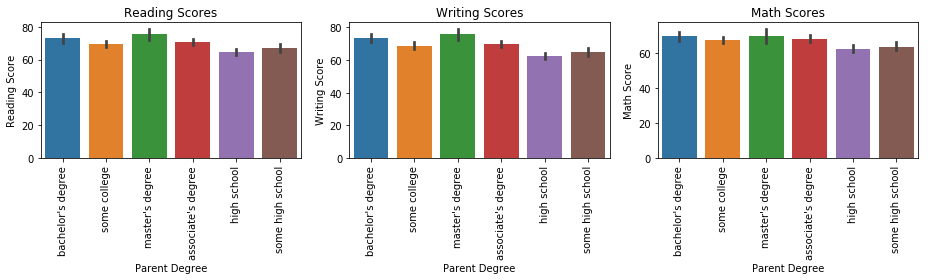

In [16]:
plt.figure(figsize=(13,4))

plt.subplot(1,3,1)
sns.barplot(x = "Parent Degree" , y="Reading Score" , data=data)
plt.xticks(rotation = 90)
plt.title("Reading Scores")

plt.subplot(1,3,2)
sns.barplot(x = "Parent Degree" , y="Writing Score" , data=data)
plt.xticks(rotation=90)
plt.title("Writing Scores")

plt.subplot(1,3,3)
sns.barplot(x = "Parent Degree" , y="Math Score" , data=data)
plt.xticks(rotation=90)
plt.title("Math Scores")

plt.tight_layout()
plt.show()

**Student's whose parents have master's degree have the highest score in all categories.**

**Student's whose parents have bachelor's degree or associate degree performed reasonably well in all categories.**

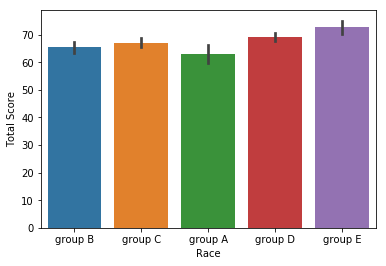

In [17]:
sns.barplot(x='Race',y='Total Score',data=data)

**From this,we can infer that Group E scored the highest scores compared to other groups.**

In [18]:
df1=data.sort_values('Total Score',ascending=False)

In [19]:
df1.head()

,Gender,Race,Parent Degree,Lunch,Course,Math Score,Reading Score,Writing Score,Total Score
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
458,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,100.000000
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667
179,female,group D,some high school,standard,completed,97,100,100,99.000000


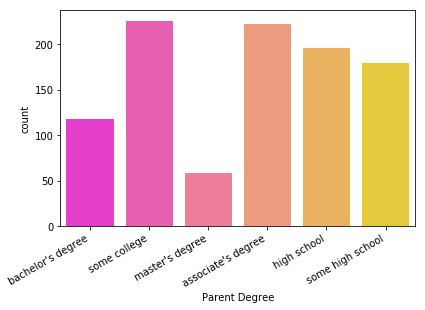

In [20]:
fig,ax=plt.subplots()
sns.countplot(x='Parent Degree',data=data,palette='spring')
plt.tight_layout()
fig.autofmt_xdate()

**The above plot shows most of the parents went to some college or had associate's degree and there are very less people 
who had higher studies.**